In [54]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#autocov = map(lambda x: int(x.strip()), open("../data/auto.cov").readlines())
#ycov = map(lambda x: int(x.strip()), open("../data/chrY.cov").readlines())
#xcov = map(lambda x: int(x.strip()), open("../data/chrX.cov").readlines())
#dists = map(lambda x: int(x.strip()), open("../data/template_lens.txt").readlines())
autocov = pd.read_csv("../data/auto.cov", sep="\t", names=["count","coverage"])
ycov = pd.read_csv("../data/chrY.cov", sep="\t", names=["count","coverage"])
xcov = pd.read_csv("../data/chrX.cov", sep="\t", names=["count","coverage"])
dists = pd.read_csv("../data/template_lens.txt", sep="\t", names=["count","dist"])

Populating the interactive namespace from numpy and matplotlib


49
48
3


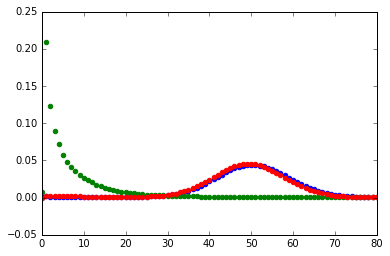

In [65]:
# Histogram of coverage
bins=np.arange(0, 150, 1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(autocov["coverage"], autocov["count"]/np.sum(autocov["count"]), color="blue")
ax.scatter(ycov["coverage"], ycov["count"]/np.sum(ycov["count"]), color="green")
ax.scatter(xcov["coverage"], xcov["count"]/np.sum(xcov["count"]), color="red")
ax.set_xlim(left=0, right=80);

def GetMedian(x, col="coverage"):
    x = x.sort(col)
    cumsum = np.cumsum(x["count"].values)
    cumsum = cumsum*1.0/np.sum(x["count"])
    print x[col].values[[i for i in range(len(cumsum)) if cumsum[i] < 0.5][-1]]

GetMedian(autocov)
GetMedian(xcov)
GetMedian(ycov)


321


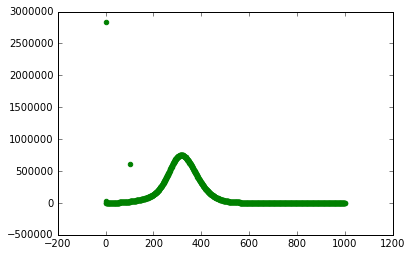

In [66]:
dists["absdist"] = dists["dist"].apply(abs)
xdists = dists[dists["absdist"]<=1000]
xdists = xdists.groupby("absdist", as_index=False).agg({"count": np.sum})
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xdists["absdist"], xdists["count"], color="green")

GetMedian(dists, col="absdist")